In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.dropna(inplace=True)

<AxesSubplot:ylabel='Density'>

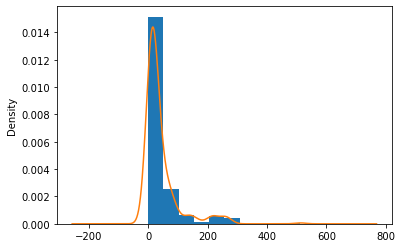

In [4]:
df['Fare'].hist(density=True)
df['Fare'].plot(kind='kde')

<AxesSubplot:>

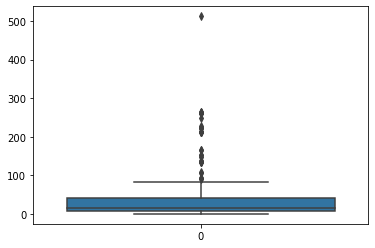

In [5]:
sns.boxplot(df['Fare'])

In [17]:
upper_limit = df['Fare'].quantile(0.95)
upper_limit

211.41875

In [18]:
lower_limit = df['Fare'].quantile(0.05)
lower_limit

7.2292

In [19]:
new_df = df[(df['Fare'] <= 211.41875) & (df['Fare'] >= 7.2292)]

In [20]:
new_df['Fare'].describe()

count    301.000000
mean      30.389507
std       33.165517
min        7.229200
25%        8.662500
50%       15.750000
75%       32.500000
max      211.337500
Name: Fare, dtype: float64

In [21]:
df['Fare'].describe()

count    331.000000
mean      40.982087
std       61.228558
min        0.000000
25%        8.050000
50%       16.000000
75%       40.633350
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:ylabel='Density'>

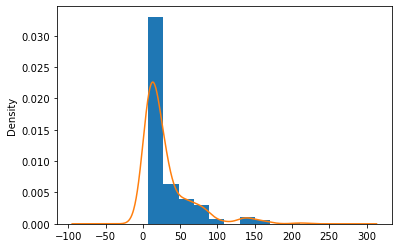

In [22]:
new_df['Fare'].hist(density=True)
new_df['Fare'].plot(kind='kde')

<AxesSubplot:>

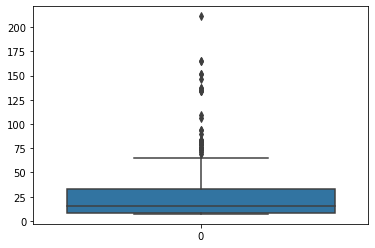

In [23]:
sns.boxplot(new_df['Fare'])

In [24]:
# Capping --> Winsorization
df['Fare'] = np.where(df['Fare'] >= upper_limit,
        upper_limit,
        np.where(df['Fare'] <= lower_limit,
        lower_limit,
        df['Fare']))

<AxesSubplot:>

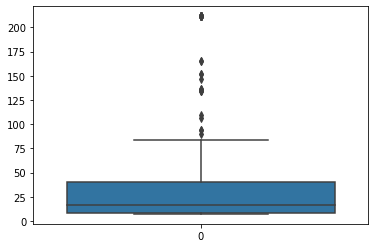

In [25]:
sns.boxplot(df['Fare'])